# **Student Admission Records**
https://www.kaggle.com/datasets/zeeshier/student-admission-records

# **📘 Dataset Summary: Student Admission Record (Dirty Version)**

The Student Admission Record dataset contains information about students and the factors that may influence their admission decision into a university or academic program.
The dataset includes demographic details, academic performance, and admission outcomes.
Since it is labeled "dirty," the raw data includes missing values, inconsistencies, and potential duplicates that require cleaning.

# **📘 Data Description Table:**
| Column Name              | Description                                           | Type       | Non-Null Count |
|--------------------------|-------------------------------------------------------|------------|----------------|
| Name                     | Full name of the student                              | object     | 147            |
| Age                      | Age of the student                                    | float64    | 147            |
| Gender                   | Student gender (Male/Female/Other)                   | object     | 147            |
| Admission Test Score     | Score obtained in the admission test                 | float64    | 146            |
| High School Percentage   | Percentage/grade obtained in high school            | float64    | 146            |
| City                     | City of residence of the student                     | object     | 147            |
| Admission Status         | Final admission result (Admitted/Rejected) — Target | object     | 147            |







In [1]:
# ===============================
# 1. Importing Libraries
# ===============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# ===============================
# 2. Load Dataset
# ===============================
df = pd.read_csv("/content/student_admission_record_dirty.csv")

print("Dataset Shape:", df.shape)
print("\nFirst Rows:")
display(df.head())

print("\nDataset Info:")
df.info()

Dataset Shape: (157, 7)

First Rows:


,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
1,Waqar,21.0,Female,99.0,60.73,Karachi,NaN
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
3,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
4,Bilal,20.0,Male,65.0,61.13,Lahore,NaN



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    147 non-null    object 
 1   Age                     147 non-null    float64
 2   Gender                  147 non-null    object 
 3   Admission Test Score    146 non-null    float64
 4   High School Percentage  146 non-null    float64
 5   City                    147 non-null    object 
 6   Admission Status        147 non-null    object 
dtypes: float64(3), object(4)
memory usage: 8.7+ KB


# **Dataset Overview**

- Number of rows: 158
- Number of columns: 7
- Target variable: Admission Status

The dataset contains student admission records including demographics, academic performance, and city.



| Column Type                | Count | Examples                                         |
|-----------------------------|-------|------------------------------------------------|
| Numerical (int64, float64)  | 3     | Age, Admission Test Score, High School Percentage |
| Categorical (object)        | 4     | Name, Gender, City, Admission Status |


In [3]:
# ===============================
# 3. Missing Values
# ===============================
print("\nMissing Values:")
print(df.isnull().sum())

# Fill numerical missing values with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical missing values with 'None'
cat_cols = df.select_dtypes(include="object").columns
df[cat_cols] = df[cat_cols].fillna("None")

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values:
Name                      10
Age                       10
Gender                    10
Admission Test Score      11
High School Percentage    11
City                      10
Admission Status          10
dtype: int64

Missing Values After Cleaning:
Name                      0
Age                       0
Gender                    0
Admission Test Score      0
High School Percentage    0
City                      0
Admission Status          0
dtype: int64


In [4]:
# ===============================
# 4. Remove Duplicates
# ===============================
print("\nDuplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()



Duplicate Rows: 6


## **Exploratory Data Analysis (EDA)**
##  Numerical Feature Insights

The dataset contains three numerical features:

**Age**  
- Represents the age of the student.  
- Values typically range from late teens to early twenties (common college admission ages).  
- Can be analyzed to see if age affects admission outcomes.  
- May require scaling for modeling.

**Admission Test Score**  
- Represents the score obtained in the admission test.  
- Scores likely range within a specific exam scale (e.g., 0–100 or 0–50).  
- Missing value: 1 entry. Can be imputed with mean/median or handled during preprocessing.  
- High scores are expected to correlate positively with Admission Status.

**High School Percentage**  
- Represents the percentage or grade obtained in high school.  
- Typical range: 0–100%.  
- Missing value: 1 entry. Can be imputed with mean/median.  
- Likely has a positive correlation with Admission Status (higher percentage → higher chance of admission).

### General Insights for Modeling

- These numerical features can be used directly in predictive models after handling missing values.  
- Checking distributions (histograms) and correlations with Admission Status will help understand their impact.  
- Scaling (StandardScaler or MinMaxScaler) might be needed for distance-based models (like KNN) or gradient-based algorithms.



Descriptive Statistics:


,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
count,151,151.000000,151,151.000000,151.000000,151,151
unique,65,NaN,3,NaN,NaN,8,3
top,None,NaN,Female,NaN,NaN,Quetta,Rejected
freq,10,NaN,82,NaN,NaN,30,73
mean,NaN,19.695364,NaN,77.940397,75.339238,NaN,NaN
std,NaN,4.448211,NaN,16.146509,16.826423,NaN,NaN
min,NaN,-1.000000,NaN,-5.000000,-10.000000,NaN,NaN
25%,NaN,18.000000,NaN,71.000000,66.040000,NaN,NaN
50%,NaN,20.000000,NaN,79.000000,77.545000,NaN,NaN
75%,NaN,22.000000,NaN,89.000000,86.925000,NaN,NaN


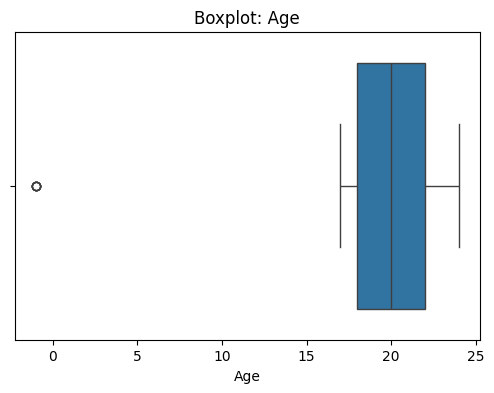

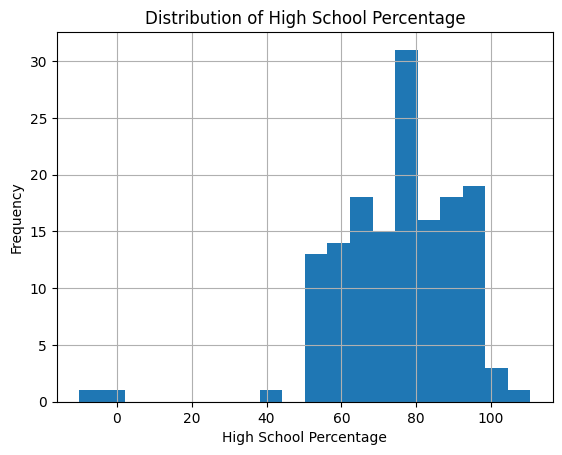


Categorical Value Counts:

--- Name ---
Name
None       10
Shehroz     6
Rohail      5
Asad        5
Maryam      5
           ..
Aqsa        1
Shahzad     1
Zarina      1
Nimra       1
Hammad      1
Name: count, Length: 65, dtype: int64

--- Gender ---
Gender
Female    82
Male      59
None      10
Name: count, dtype: int64

--- City ---
City
Quetta        30
Karachi       26
Multan        18
Islamabad     17
Lahore        17
Peshawar      17
Rawalpindi    16
None          10
Name: count, dtype: int64

--- Admission Status ---
Admission Status
Rejected    73
Accepted    68
None        10
Name: count, dtype: int64


In [5]:
# ===============================
# 5. Exploratory Data Analysis (EDA)
# ===============================

# Summary Statistics
print("\nDescriptive Statistics:")
display(df.describe(include="all"))

# Example: Boxplot for Age
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Age"])
plt.title("Boxplot: Age")
plt.show()

# Histogram for High School Percentage
df["High School Percentage"].hist(bins=20)
plt.title("Distribution of High School Percentage")
plt.xlabel("High School Percentage")
plt.ylabel("Frequency")
plt.show()

# Value Counts for Categorical Columns
print("\nCategorical Value Counts:")
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())

In [6]:
# ===============================
# 6. Encoding Categorical Columns
# ===============================
le = LabelEncoder()
df_encoded = df.copy()

for col in cat_cols:
    df_encoded[col] = le.fit_transform(df[col])

In [7]:
# ===============================
# 7. Normalizing Numerical Columns
# ===============================
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

print("\nEncoded + Normalized Data:")
display(df_encoded.head())


Encoded + Normalized Data:


,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,54,0.970943,0,-1.736188,-0.383960,6,2
1,61,0.294271,0,1.308622,-0.871121,1,1
2,11,-0.607960,1,0.687233,0.131525,0,0
3,4,-0.607960,1,-1.425493,0.593345,1,2
4,10,0.068713,1,-0.804103,-0.847270,2,1


In [8]:
# ===============================
# 8. Save Processed CSV
# ===============================
df_encoded.to_csv("encoded_student_admission_data.csv", index=False)
print("\nProcessed file saved as: encoded_student_admission_data.csv")


Processed file saved as: encoded_student_admission_data.csv
